<a href="https://colab.research.google.com/github/aparna993/Capstone-Project/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!wget http://cb.lk/covid_19
!unzip covid_19
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"


--2020-11-19 03:15:56--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-11-19 03:15:56--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-11-19 03:15:58--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-11-19 03:15:58--  https://www.dropbox.com/s/raw/7rjw

# **COVID 19 Detector**

In [3]:
#Importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

# **Model**

In [67]:
# Model building using keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy','mse','AUC','Precision','Recall'])

In [68]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 54, 54, 64)      

# **Training and Test Data Generation**

In [69]:
# Data processing for model training

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [70]:
#Training Data 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),#specified target size
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [71]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [72]:
#Test Data
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [73]:
#Training the model
history = model.fit_generator(
    train_generator,
    # steps_per_epoch=8
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 0.8738 - accuracy: 0.5938 - mse: 0.2789 - auc: 0.6023 - precision: 0.5854 - recall: 0.6429 - val_loss: 0.6768 - val_accuracy: 0.7333 - val_mse: 0.2418 - val_auc: 0.9644 - val_precision: 1.0000 - val_recall: 0.4667
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.5888 - accuracy: 0.7098 - mse: 0.2007 - auc: 0.7651 - precision: 0.7080 - recall: 0.7143 - val_loss: 0.5280 - val_accuracy: 0.9167 - val_mse: 0.1691 - val_auc: 0.9772 - val_precision: 0.9310 - val_recall: 0.9000
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.4479 - accuracy: 0.8259 - mse: 0.1427 - auc: 0.8813 - precision: 0.8614 - recall: 0.7768 - val_loss: 0.3590 - val_accuracy: 0.9333 - val_mse: 0.0975 - val_auc: 0.9900 - val_precision: 0.9062 - val_recall: 0.9667
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.3392 - accuracy: 0.8527 - mse: 0.1026 - auc: 0.9365 - precision: 0.8319 - recall

# **Results**

dict_keys(['loss', 'accuracy', 'mse', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_mse', 'val_auc', 'val_precision', 'val_recall'])


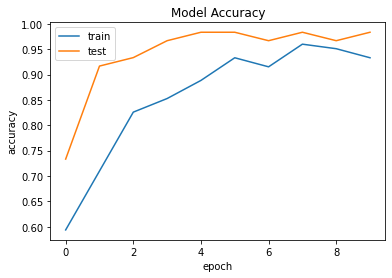

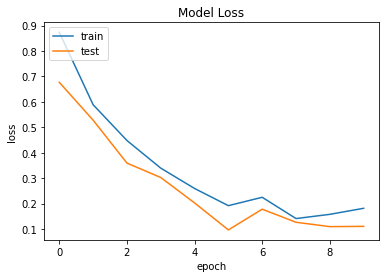

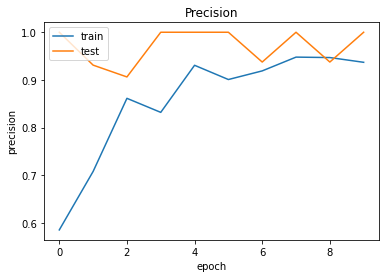

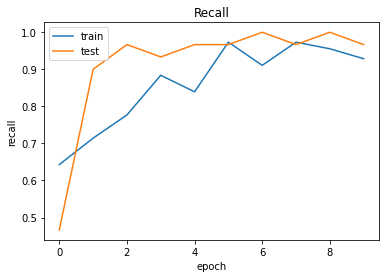

In [74]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()